In [10]:
import numpy as np
import LatticeDefinitions as ld
import GeometryFunctions as gf
import GeneralLattice as gl
import LAMMPSDump as LD
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

In [13]:
##File format Tripleline ID, Tripleline Centre, TJ Energy, Radius, TJ Atoms
##GBEnergy, GBAtoms
strDirectory = '/home/paul/csf3_scratch/TripleLines/data'
lstAllFilenames = []
strData = ''
for j in range(1,19):
    fin = open(strDirectory + str(j) + '/summary.data' + str(j), 'rt')
    strData +=  fin.read()
df = pd.DataFrame([x.split(',') for x in strData.split('\n')])
df

,0,1,2,3,4,5,6,7,8
0,1,UTJ0,[206.70613426 75.11768472 34.36538957],-3.310345416666667,1.5187499999999998,24,-3.2965486983082712,2140,238.19067149346756
1,1,UTJ1,[361.43626334 208.3518704 34.36538957],-3.328163333333334,3.0374999999999996,120,-3.3036824147182826,5230,230.75938264208494
2,1,UTJ2,[197.63714479 209.87203612 34.36538957],-3.2892827083333334,2.53125,48,-3.3062380796938315,4466,239.9126477237865
3,1,UTJ3,[240.59186226 137.74080189 34.36538957],-3.2807310810810812,3.5437499999999997,148,-3.308465238484156,6133,225.3505611534469
4,1,UTJ4,[120.9285625 70.9112619 34.36538957],-3.323036666666667,2.53125,96,-3.299703682661838,4418,241.64405282821738
5,1,UTJ5,[323.58172234 141.46174003 34.36538957],-3.3151272916666663,2.025,48,-3.294405563517915,3070,226.23192740649517
6,2,UTJ0,[196.82130672 208.67678071 34.36538957],-3.3102797916666677,3.0374999999999996,96,-3.3047517702482336,5530,236.4077593057343
7,2,UTJ1,[240.2245385 1.14005646 34.36538957],-3.2652090277777774,2.025,72,-3.2945731963869465,3872,298.2703481768158
8,2,UTJ2,[119.648125 67.493025 34.36538957],-3.28524,1.5187499999999998,48,-3.2983311067193672,2277,245.25592850160572
9,3,UTJ0,[321.51805319 143.37616386 34.36538957],-3.2241041666666668,2.025,24,-3.2934129399141634,3274,236.55819245368698


/home/paul/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/paul/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([0.02702703, 0.        , 0.        , 0.02702703, 0.02702703,
        0.        , 0.02702703, 0.05405405, 0.02702703, 0.08108108,
        0.16216216, 0.08108108, 0.05405405, 0.02702703, 0.13513514,
        0.10810811, 0.02702703, 0.02702703, 0.02702703, 0.05405405]),
 array([-0.24508148, -0.23730976, -0.22953803, -0.22176631, -0.21399458,
        -0.20622286, -0.19845113, -0.19067941, -0.18290769, -0.17513596,
        -0.16736424, -0.15959251, -0.15182079, -0.14404906, -0.13627734,
        -0.12850561, -0.12073389, -0.11296216, -0.10519044, -0.09741872,
        -0.08964699]),
 <a list of 20 Patch objects>)

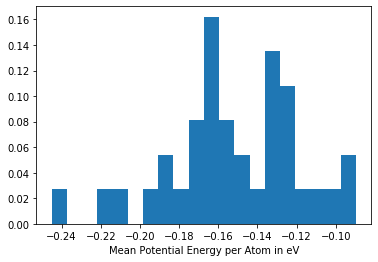

In [5]:
arrValues = df[3].astype('float')-3*df[6].astype('float')-2*3.3594*np.ones(len(df));
plt.xlabel('Mean Potential Energy per Atom in eV')
arrWeights = np.ones(len(arrValues))/len(arrValues)
plt.hist(arrValues,bins=20, weights = arrWeights)

In [21]:
print(np.mean(arrValues),3.48*np.sqrt(np.var(arrValues)))

-0.160996436943018 0.14339839051717276


(array([2., 0., 0., 0., 1., 0., 1., 3., 5., 8., 2., 1., 2., 5., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 1.]),
 array([-0.25485565, -0.24912709, -0.24339853, -0.23766997, -0.23194141,
        -0.22621285, -0.22048428, -0.21475572, -0.20902716, -0.2032986 ,
        -0.19757004, -0.19184148, -0.18611292, -0.18038436, -0.17465579,
        -0.16892723, -0.16319867, -0.15747011, -0.15174155, -0.14601299,
        -0.14028443, -0.13455587, -0.1288273 , -0.12309874, -0.11737018,
        -0.11164162]),
 <a list of 25 Patch objects>)

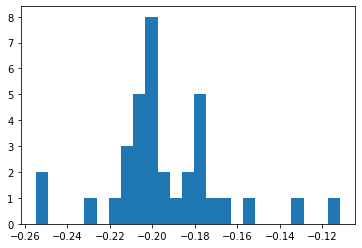

In [10]:
lstPEVol = []
for j in range(len(df)-1):
    arrRow = df.iloc[[j]][[3,4,5]].astype('float').to_numpy()[0]
    lstPEVol.append(arrRow[0]*arrRow[2]/(np.pi*arrRow[1]**2*80.1))
arrRow
plt.hist(lstPEVol, bins =25)

In [54]:
np.array(df[2].astype('float'))

array([-3.28757135, -3.2696219 , -3.22917926, -3.20094552, -3.19314895,
       -3.21978979, -3.256658  , -3.25284264, -3.2396385 , -3.27313091,
       -3.189654  , -3.19186424, -3.27455638, -3.23486629, -3.25155647,
       -3.23680486, -3.26443226, -3.27341084, -3.25808823, -3.25101133,
       -3.29075153, -3.2956558 , -3.24029258, -3.26165204, -3.27786511,
       -3.27129617, -3.23470769, -3.2244325 , -3.3373095 , -3.28278836,
       -3.27911935, -3.25703422, -3.24601487, -3.23996403, -3.2662471 ,
       -3.23806237, -3.247125  , -3.24329724, -3.26004571, -3.26955623,
       -3.24197711, -3.26293592, -3.2653772 , -3.26697144, -3.26493382,
       -3.25514214, -3.25571417, -3.27467219, -3.25423302, -3.27727743,
       -3.26594461, -3.24263704, -3.23926941, -3.2449504 , -3.20296275,
       -3.23690181, -3.22807889, -3.28641532, -3.21831708, -3.25442   ,
       -3.28142225, -3.19328967, -3.23681831, -3.2501956 , -3.2323508 ,
       -3.3188307 , -3.24722051, -3.26062865, -3.25237227, -3.22